# Lung Cancer Analysis & Prediction using CovNet

In [23]:
# load the libraries
import numpy as np
import pandas as pd
from numpy import loadtxt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Flatten, Dense

In [24]:
# load the dataset
dataset = loadtxt(fname="survey lung cancer.csv", delimiter=',', skiprows=1)

In [25]:
# split data into input and output variables
feature_vector = dataset[:, 0:15]
target_vector = dataset[:, 15]
print(feature_vector)
print(target_vector)

[[ 0. 69.  1. ...  2.  2.  2.]
 [ 0. 74.  2. ...  2.  2.  2.]
 [ 1. 59.  1. ...  2.  1.  2.]
 ...
 [ 1. 38.  2. ...  2.  1.  2.]
 [ 0. 26.  2. ...  1.  1.  1.]
 [ 0. 61.  2. ...  2.  1.  1.]]
[1. 1. 2. ... 1. 2. 2.]


In [32]:
# reshape the data to simulate a greyscale image
tmp = np.array(feature_vector)
tmp = tmp.reshape(-1, 3, 5)
feature_vector = pd.DataFrame(sum(map(list, tmp), []))
tmp = []
for i,g in feature_vector.groupby(np.arange(len(feature_vector)) // 2):
    tmp.append(g)
tmp = np.array([i.to_numpy() for i in tmp])
feature_vector = tmp.reshape(55394, 3, 5, 1)#error

In [33]:
# define the keras model
model = Sequential()
model.add(Conv2D(1, activation="relu", kernel_size=2, input_shape=(3, 5, 1)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1, input_shape=(3, 5, 1), activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 2, 4, 1)           5         
                                                                 
 batch_normalization_3 (Batc  (None, 2, 4, 1)          4         
 hNormalization)                                                 
                                                                 
 flatten_2 (Flatten)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18
Trainable params: 16
Non-trainable params: 2
_________________________________________________________________


In [40]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# fit the keras model on the dataset
history = model.fit(feature_vector, target_vector, epochs=20, batch_size=0, validation_data=(feature_vector, target_vector))

Epoch 1/20
1732/1732 [==============================] - 6s 3ms/step - loss: -29123.1777 - accuracy: 0.5039 - val_loss: -29783.9688 - val_accuracy: 0.5039
Epoch 2/20
1732/1732 [==============================] - 6s 3ms/step - loss: -30511.2363 - accuracy: 0.5039 - val_loss: -31158.8496 - val_accuracy: 0.5039
Epoch 3/20
1732/1732 [==============================] - 6s 3ms/step - loss: -31934.8184 - accuracy: 0.5039 - val_loss: -32607.6855 - val_accuracy: 0.5039
Epoch 4/20
1732/1732 [==============================] - 6s 3ms/step - loss: -33395.6641 - accuracy: 0.5039 - val_loss: -34090.6641 - val_accuracy: 0.5039
Epoch 5/20
1732/1732 [==============================] - 6s 3ms/step - loss: -34877.8906 - accuracy: 0.5039 - val_loss: -35571.6914 - val_accuracy: 0.5039
Epoch 6/20
1732/1732 [==============================] - 6s 4ms/step - loss: -36390.0078 - accuracy: 0.5039 - val_loss: -37128.8242 - val_accuracy: 0.5039
Epoch 7/20
1732/1732 [==============================] - 6s 3ms/step - loss: 

In [47]:
# evaluate the keras model
accuracy = model.evaluate(feature_vector, target_vector)

1732/1732 [==============================] - 3s 2ms/step - loss: -61834.7383 - accuracy: 0.5039


In [48]:
import pandas as pd
metrics_df = pd.DataFrame(history.history)

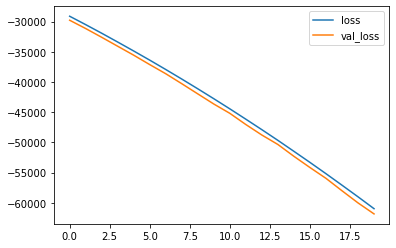

In [49]:
metrics_df[["loss","val_loss"]].plot();

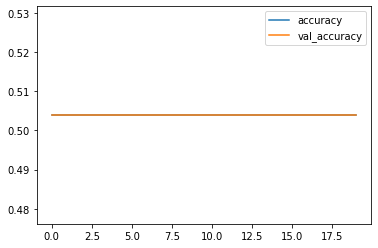

In [50]:
metrics_df[["accuracy","val_accuracy"]].plot();